# On cherche à trouver le meilleur plan d'expérience

In [1]:
import matplotlib.pyplot as plt
import numpy as np

Nous considérons un vecteur de $8$ fonctions $X = (f_1, f_2, \dots, f_8)$
où chaque fonction $f_i$ est définie sur l'intervalle temporel $[0,T]$ et prend ses valeurs dans $[-1,5]$.  
Ces fonctions modélisent des signaux périodiques et aléatoires, construits à l'aide d'une décomposition de Fourier tronquée.

Pour chaque paramètre $\alpha_i \in [0.5,3]$, nous générons une fonction $f_i$ à partir d'une série de Fourier complexe de la forme
$f_i(t)= 2 + A \sum_{k=0}^{N-1} a_{i,k}\,(1+k^2)^{\alpha_i}\, e^{\, i \,\omega_{i}\, k\, t},\qquad t \in [0,T].
$

Dans cette expression :  
    - $N$ est le nombre de modes de Fourier conservés ;  
    - les coefficients aléatoires $a_{i,k}$ sont tirés uniformément dans $[-1,1]$ ;  
    - le terme $(1+k^2)^{\alpha_i}$ impose une décroissance contrôlée de l'amplitude des hautes fréquences ;  
    - $\omega_i$ est une pulsation aléatoire, choisie uniformément dans l'intervalle $\left[\frac{2\pi}{T_{\min}}, \frac{2\pi}{T_{\max}}\right]$ ;  
    - $A=2$ est une amplitude globale permettant de centrer les signaux dans l'intervalle $[-1,5]$ après ajout d'un biais constant ;  
    - nous ne conservons finalement que la partie réelle de la série afin d'obtenir un signal réel.  

Ainsi, pour chaque valeur de $\alpha_i$, nous obtenons une fonction périodique dont la régularité dépend directement du paramètre $\alpha_i$ :  
plus $\alpha_i$ est grand, plus la décroissance des coefficients de Fourier est rapide, et plus la fonction générée est régulière.

In [3]:
T=36                  # On regarde toutes les 10 minutes pendant 6 heures
t=np.linspace(1,T,T)    # t=[1,2,...,36]

alphas=np.sort(np.random.uniform(0,2,8))
print("alphas=",alphas)

def Simulation_aléatoire(alphas):
    params = []  # stockera les paramètres figés
    N_fourier = 20
    for alpha in alphas:
        a = np.random.uniform(-1, 1, N_fourier)
        k = np.arange(N_fourier)
        decay = 1.0 / (1 + k**2)**alpha
        phase = 2 * np.pi / np.random.uniform(0,T)
        amplitude = 2
        params.append((a, k, decay, phase, amplitude))

    def make_func(a, k, decay, phase, amplitude):
        return lambda t: 2 + amplitude * np.sum(
            (a * decay)[:, None] * np.exp(1j * phase * k[:, None] * t[None, :]),
            axis=0
        ).real

    return np.array([make_func(*p) for p in params], dtype=object)


alphas= [0.28104702 0.35822082 0.67399723 0.84552636 1.22777974 1.33791807
 1.94531492 1.99826997]


On choisit nos alphas une fois et on ne les change plus

(8,)


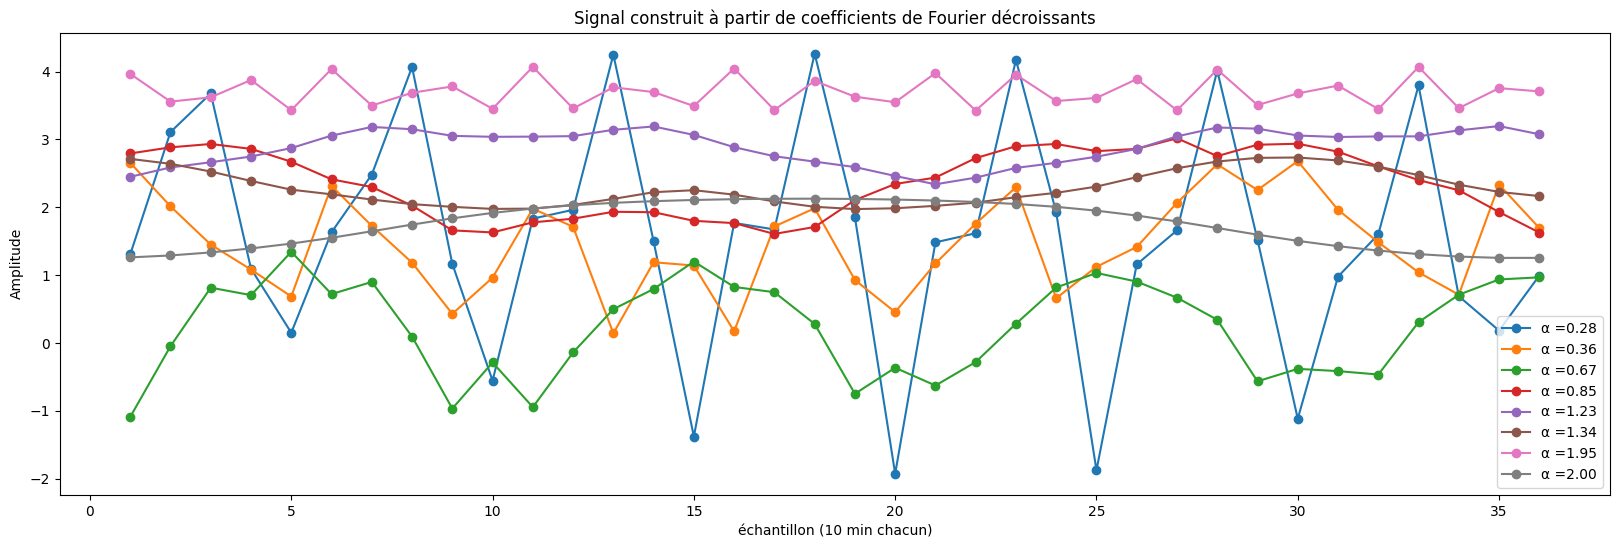

(8,)


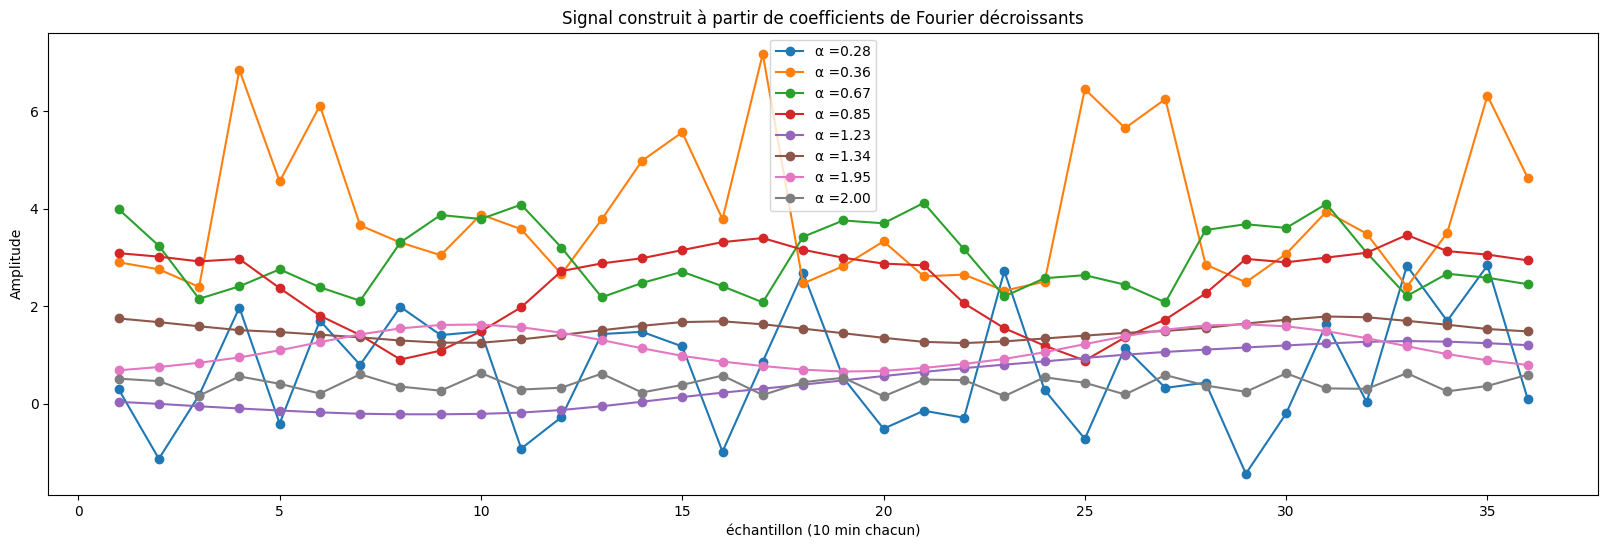

(8,)


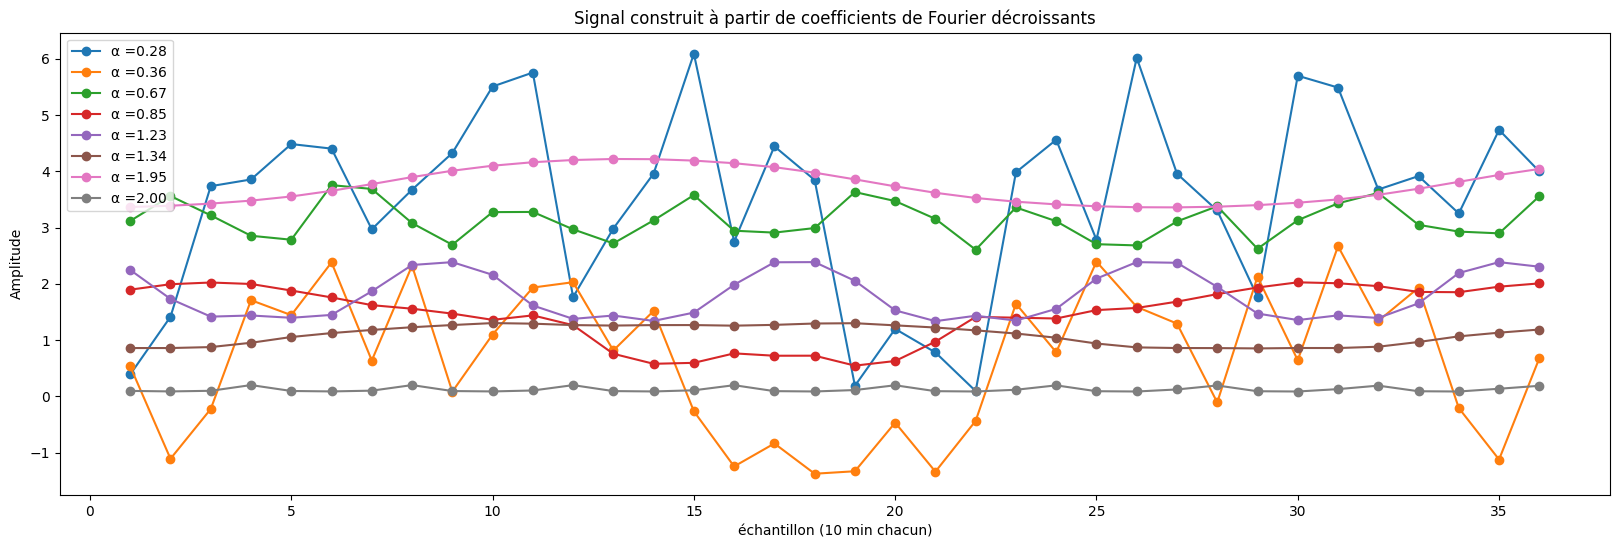

In [4]:
N=3
for i in range(1,N+1):

    X = Simulation_aléatoire(alphas) # exemple de 8 séries temporelles simulées
    print(X.shape)

    plt.figure(figsize=(20,6))
    for i in range(8):
        plt.plot(t, X[i](t),marker='o',label=f"α ={alphas[i]:.2f}")
    plt.xlabel('échantillon (10 min chacun)')
    plt.ylabel('Amplitude')
    plt.title('Signal construit à partir de coefficients de Fourier décroissants')
    plt.legend()
    plt.show()

On va avoir besoin de calculer la distance entre 2 entrées. Pour cela on choisit d'utiliser la définition (14) page 9 du papier "Gaussian process metamodeling of functional-input code
for coastal flood hazard assessment" (On le retrouve dans le dossier *Références*).

In [5]:
def dist_L2(X, Y):
    norm=0
    for i in range(8):
        norm += np.linalg.norm(X[i](t) - Y[i](t))
    return np.sqrt(norm)

X1 = Simulation_aléatoire(alphas)
X2 = Simulation_aléatoire(alphas) 
print(dist_L2(X1,X2))
print(dist_L2(X1,X1))


8.83803065654441
0.0


On va créer plusieurs plans d'expérience (N_plans = 1000). Chaque plan est composé de plusieurs entrées (N_entrées = 200).
Chaque entrée est composée de 8 fonctions comme discuté plus tôt.

In [6]:
def plan(N_entrees,alphas):
    return np.array([Simulation_aléatoire(alphas) for _ in range(N_entrees)], dtype=object)

N_entrees = 200
N_plans = 1000

plans  = np.array([plan(N_entrees,alphas) for _ in range(N_plans)], dtype=object)

print(plans.shape)

(1000, 200, 8)


On utilise un algo de minimum classique pour trouver la distance minimum entre les entrées au sein d'un plan:

In [ ]:
def dist_min(plan):
    # plan: shape (N_entrées, 8)
    dmin = np.inf
    for i in range(100):
        for j in range(i+1, 100):
            d = dist_L2(plan[i], plan[j])
            dmin = min(dmin, d)
    #print("fini")
    return dmin

Et on trouve le plan qui maximise la distance minimum entre les points.

In [9]:
mins = np.array([dist_min(p) for p in plans])
best_index = np.argmax(mins)
best_plan = plans[best_index]

fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini
fini


On évalue nos fonctions pour les stocker en dur dans un fichier, python ne peut pas stocker les fonctions directement d'apres ChatGPT.

In [ ]:
best_plan_values = np.zeros((N_entrees, 8, T))

for i in range(N_entrees):
    for j in range(8):
        best_plan_values[i, j, :] = best_plan[i, j](t)  # évaluation de la fonction

np.save("./data_DoE/best_plan_values_2.npy", best_plan_values)


In [ ]:
test = plan(2000,alphas)
test_values = np.zeros((2000, 8, T))

for i in range(2000):
    for j in range(8):
        test_values[i, j, :] = test[i, j](t)  # évaluation de la fonction


np.save("./data_DoE/test_values_2.npy", test_values)

## Affichage de 3 entrées de notre plan d'expérience

In [13]:
best_plan_values.shape

(200, 8, 36)

C:\Users\sliss\AppData\Local\Temp\ipykernel_40176\2321394126.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


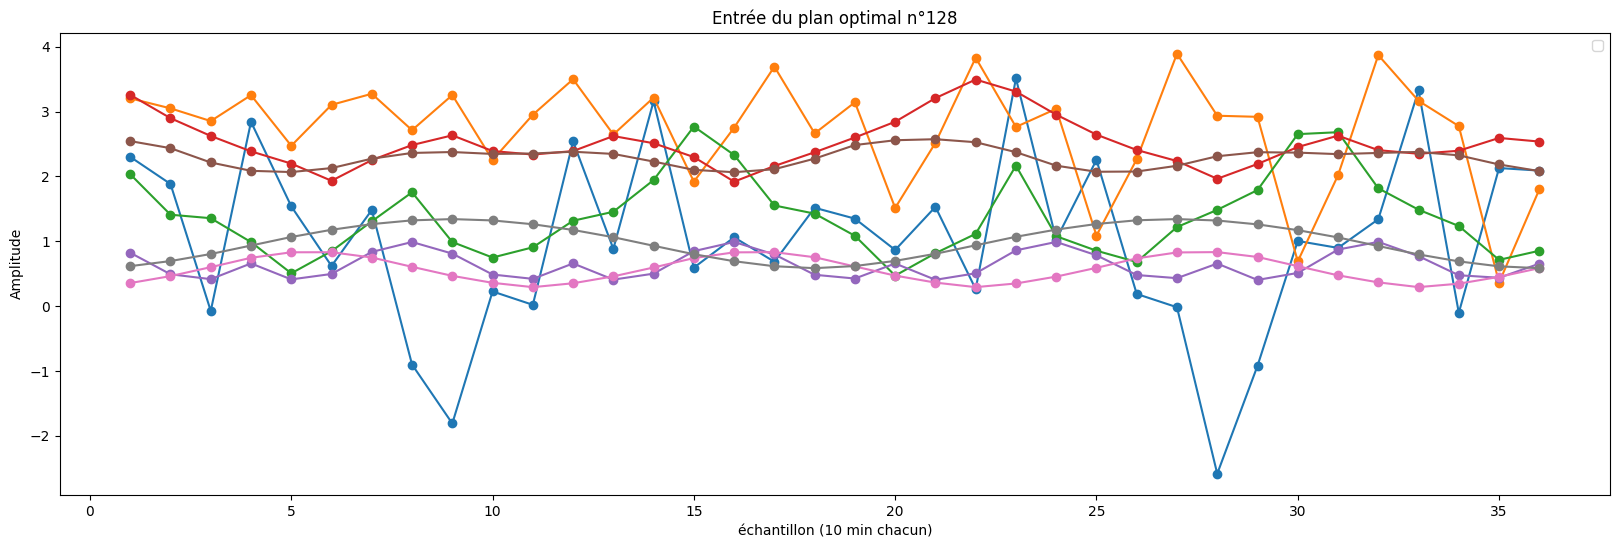

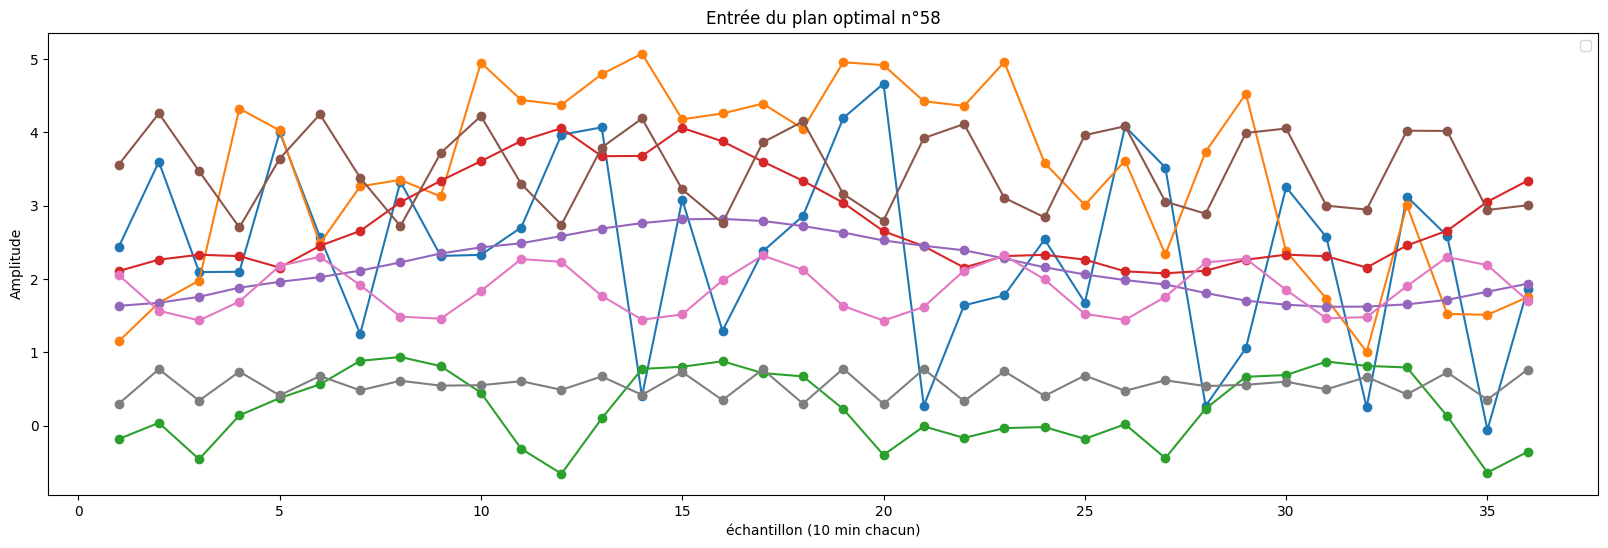

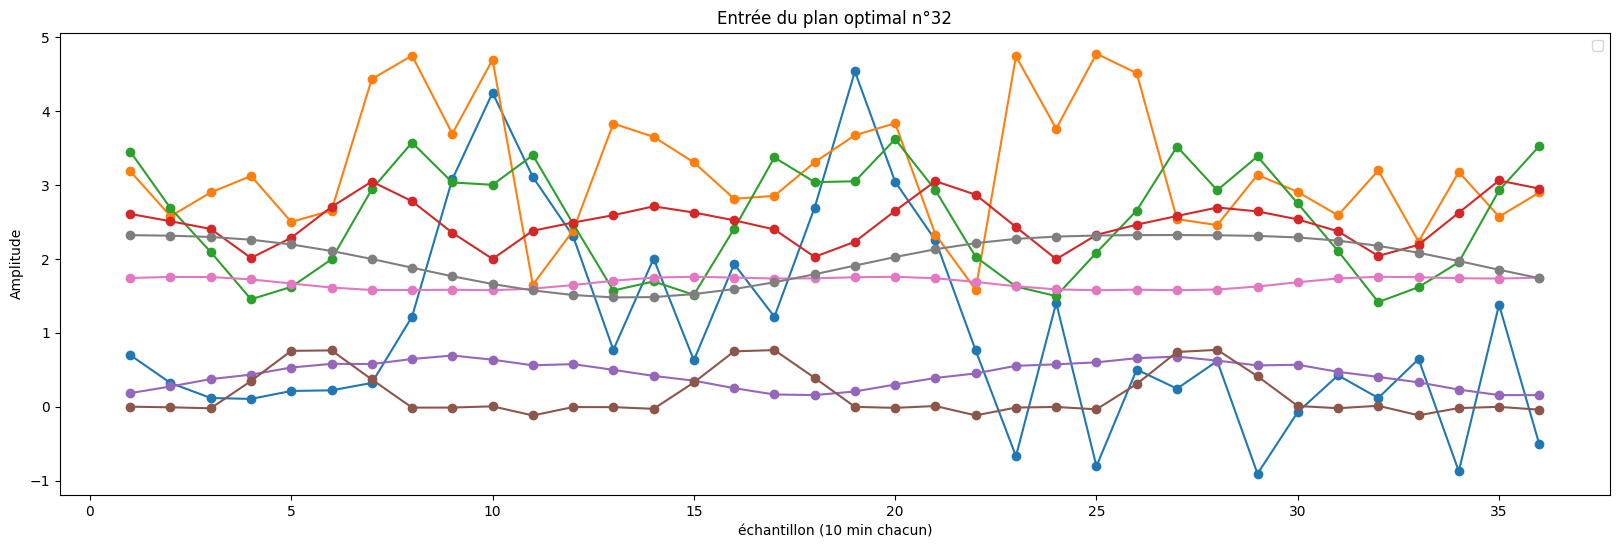

In [ ]:
#best_plan_values = np.load("./data_DoE/best_plan_values.npy")
best_plan_values = np.load("./data_DoE/best_plan_values_2.npy")
for _ in range(3):

    j = np.random.randint(0, 200)
    X = best_plan_values[j]
    plt.figure(figsize=(20,6))
    for i in range(8):
        plt.plot(t, X[i],marker='o')
    plt.xlabel('échantillon (10 min chacun)')
    plt.ylabel('Amplitude')
    plt.title(f"Entrée du plan optimal n°{j}")
    plt.legend()
    plt.show()